In [283]:
import numpy as np
import pandas as pd
from keras.utils import to_categorical
import matplotlib.pyplot as plt
from keras.datasets import mnist


In [284]:
(X_train,y_train),(X_test,y_test)=mnist.load_data()
X_train=X_train.reshape(X_train.shape[0],X_train.shape[1]**2)
X_test=X_test.reshape(X_test.shape[0],X_test.shape[1]**2)

In [285]:
X_train=X_train.astype(np.float32).T
y_train=y_train.astype(np.int32)
X_test=X_test.astype(np.float32).T
y_test=y_test.astype(np.int32)
y_train_onehot=to_categorical(y_train).T

In [286]:
n_hidden=100
n_input=X_train.shape[0]
digits=10
learning_rate=0.001
momentum=0.9
epochs=20
# initialization
params = {"W1": np.random.randn(n_hidden, n_input) * np.sqrt(1. / n_input),
          "b1": np.zeros((n_hidden, 1)) * np.sqrt(1. / n_input),
          "W2": np.random.randn(digits, n_hidden) * np.sqrt(1. / n_hidden),
          "b2": np.zeros((digits, 1)) * np.sqrt(1. / n_hidden)}
old_params={"old_W1":params["W1"],"old_b1":params["b1"],"old_W2":params["W2"],"old_b2":params["b2"]}

In [287]:
def sigmoid(z):
    """
    sigmoid activation function.

    inputs: z
    outputs: sigmoid(z)
    """
    s = 1. / (1. + np.exp(-z))
    return s
def compute_loss(Y, Y_hat):
    """
    compute loss function
    """
    L_sum = np.sum(np.multiply(Y, np.log(Y_hat)))
    m = Y.shape[1]
    L = -(1./m) * L_sum

    return L
def feed_forward(X, params):
    """
    feed forward network: 2 - layer neural net

    inputs:
        params: dictionay a dictionary contains all the weights and biases

    return:
        cache: dictionay a dictionary contains all the fully connected units and activations
    """
    cache = {}

    # Z1 = W1.dot(x) + b1
    cache["Z1"] = np.matmul(params["W1"], X) + params["b1"]

    # A1 = sigmoid(Z1)
    cache["A1"] = sigmoid(cache["Z1"])

    # Z2 = W2.dot(A1) + b2
    cache["Z2"] = np.matmul(params["W2"], cache["A1"]) + params["b2"]

    # A2 = softmax(Z2)
    cache["A2"] = np.exp(cache["Z2"]) / np.sum(np.exp(cache["Z2"]), axis=0)

    return cache
def back_propagate(X, Y, params, cache):
    """
    back propagation

    inputs:
        params: dictionay a dictionary contains all the weights and biases
        cache: dictionay a dictionary contains all the fully connected units and activations

    return:
        grads: dictionay a dictionary contains the gradients of corresponding weights and biases
    """
    m=X_train.shape[1]
    # error at last layer
    dZ2 = cache["A2"] - Y

    # gradients at last layer (Py2 need 1. to transform to float)
    dW2 = (1. / m) * np.matmul(dZ2, cache["A1"].T)
    db2 = (1. / m) * np.sum(dZ2, axis=1, keepdims=True)

    # back propgate through first layer
    dA1 = np.matmul(params["W2"].T, dZ2)
    dZ1 = dA1 * sigmoid(cache["Z1"]) * (1 - sigmoid(cache["Z1"]))

    # gradients at first layer (Py2 need 1. to transform to float)
    dW1 = (1. / m) * np.matmul(dZ1, X.T)
    db1 = (1. / m) * np.sum(dZ1, axis=1, keepdims=True)

    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}

    return grads


def train(X,y,params,learning_rate=0.1,momentum=0.9,epochs=100):
    loss=[]
    acc=[]
    for i in range(epochs):
    
        # forward and backward
        cache = feed_forward(X, params)
        grads = back_propagate(X, y, params, cache)

        
        extra_W1=params["W1"]-old_params["old_W1"]
        old_params["old_W1"]=params["W1"]
        extra_b1=params["b1"]-old_params["old_b1"]
        old_params["old_b1"]=params["b1"]
        extra_W2=params["W2"]-old_params["old_W2"]
        old_params["old_W2"]=params["W2"]
        extra_b2=params["b2"]-old_params["old_b2"]
        old_params["old_b2"]=params["b2"]
    # gradient descent
        
        params["W1"] = params["W1"] - learning_rate * grads["dW1"]+momentum*extra_W1
        params["b1"] = params["b1"] - learning_rate * grads["db1"]+momentum*extra_b1
        params["W2"] = params["W2"] - learning_rate * grads["dW2"]+momentum*extra_W2
        params["b2"] = params["b2"] - learning_rate * grads["db2"]+momentum*extra_b2

        train_loss = compute_loss(y, cache["A2"])
        print("Epoch {}: training loss = {}".format(i + 1, train_loss))
        loss.append(train_loss)
        prediction=predict(X,params)
        accuracy=np.mean(np.array(prediction==y_train,np.int32))
        acc.append(accuracy)
    fig,ax=plt.subplots(1,2,figsize=(16,4))
    ax[0].plot(range(epochs),loss)
    ax[0].set_title("Loss ={0:.2f} (epoch={1},n_hidden={2},learning rate={3},momentum ={4})".format(loss[-1],epochs,n_hidden,learning_rate,momentum))
    ax[1].plot(range(epochs),acc)
    ax[1].set_title("Accuracy={0:.2f} (epoch={1},n_hidden={2},learning rate ={3},momentum ={4})".format(acc[-1],epochs,n_hidden,learning_rate,momentum))
    plt.savefig("epoch={} n_hidden={} learning rate = {} momentum = {}.png".format(epochs,n_hidden,learning_rate,momentum))
    
    
    
        

def predict(X,params):
    cache = feed_forward(X, params)
    output=cache["A2"]
    return np.argmax(output.T,axis=1)
    
    



Epoch 1: training loss = 2.572882515019095
Epoch 2: training loss = 2.259569745475846
Epoch 3: training loss = 1.9649382725445026
Epoch 4: training loss = 1.724554204999091
Epoch 5: training loss = 1.5193981059845612
Epoch 6: training loss = 1.3607393496605287
Epoch 7: training loss = 1.228165528950382
Epoch 8: training loss = 1.1114614750333422
Epoch 9: training loss = 1.01514716880831
Epoch 10: training loss = 0.9312549269957292
Epoch 11: training loss = 0.8630681293539072
Epoch 12: training loss = 0.8011114319206564
Epoch 13: training loss = 0.7375484699355004
Epoch 14: training loss = 0.680717705926051
Epoch 15: training loss = 0.6408157950439561
Epoch 16: training loss = 0.6097249097790693
Epoch 17: training loss = 0.58022087353348
Epoch 18: training loss = 0.5499722326124743
Epoch 19: training loss = 0.5229441882436717
Epoch 20: training loss = 0.5019305434758181
Epoch 21: training loss = 0.48347840448813084
Epoch 22: training loss = 0.4660968707447607
Epoch 23: training loss = 0

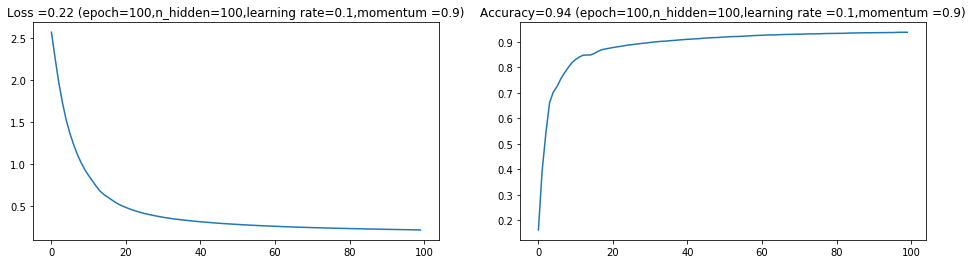

In [288]:
train(X_train,y_train_onehot,params)

In [289]:
test_prediction=predict(X_test,params)

In [291]:
accuracy=np.mean(np.array(test_prediction==y_test,np.int32))

In [292]:
accuracy

0.9227